In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import folium
# from folium.plugins import HeatMap
# from folium.plugins import HeatMapWithTime

%matplotlib inline

In [8]:
lrpd = pd.read_csv("../data/lrpd-clean.csv")

In [ ]:
lrpd.head()

### Question: What Year had the most amount of crime, and how many crimes occurred that year?

In [ ]:
yearly_crimes = pd.DataFrame({'Year': [], 'Crimes': []})

In [ ]:
lrpd["INCIDENT_DATE"] = pd.to_datetime(lrpd["INCIDENT_DATE"])

In [ ]:
for year in lrpd["INCIDENT_DATE"].dt.year.unique():
    yearly_data = lrpd.loc[lrpd["INCIDENT_DATE"].dt.year == year]
    yearly_crime = yearly_data["OFFENSE_DESCRIPTION"].value_counts().sum()

    yearly_crimes.loc[len(yearly_crimes.index)] = [year, yearly_crime]

In [ ]:
yearly_crimes = yearly_crimes.set_index("Year").sort_index()
yearly_crimes

In [ ]:
sns.barplot(data=yearly_crimes, x=yearly_crimes.index, y=yearly_crimes["Crimes"])
plt.title("Amount of Crimes-per-Year in Little Rock, AR.")
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.show()
plt.show()

### Answer: 2017, ~16,000

### Question: What were the most common Violent Crimes? Non-Violent?

In [ ]:
violent_crime_occurrence = pd.DataFrame({ "Crime": [], "Occurrence": [] })
nonviolent_crime_occurrence = pd.DataFrame({ "Crime": [], "Occurrence": [] })

violent_offenses = lrpd.loc[lrpd["CRIME_TYPE"] == "Violent Crime"]
for offense in violent_offenses["OFFENSE_DESCRIPTION"].unique():
    occurrence = violent_offenses.loc[violent_offenses["OFFENSE_DESCRIPTION"] == offense].value_counts().sum()

    violent_crime_occurrence.loc[len(violent_crime_occurrence.index)] = [offense, occurrence]

nonviolent_offenses = lrpd.loc[lrpd["CRIME_TYPE"] == "Non-Violent Crime"]
for offense in nonviolent_offenses["OFFENSE_DESCRIPTION"].unique():
    occurrence = nonviolent_offenses.loc[nonviolent_offenses["OFFENSE_DESCRIPTION"] == offense].value_counts().sum()

    nonviolent_crime_occurrence.loc[len(nonviolent_crime_occurrence.index)] = [offense, occurrence]

In [ ]:
ax = sns.barplot(data=violent_crime_occurrence, x=["Rape", "Larceny", "Robbery", "Burglary", "Agg. Assault", "Murder & Manslaughter"], y=violent_crime_occurrence["Occurrence"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Offense to Offense Occurrence for Violent Crimes in Little Rock, AR.")
plt.xlabel("Offense")
plt.ylabel("Offense Occurrence")
plt.show()

In [ ]:
ax = sns.barplot(data=nonviolent_crime_occurrence, x=["Theft from MV", "Theft of MV Parts", "Shoplifting", "Theft from Building", "MV Theft", "Purse-Snatching", "Pocket-Picking", "Theft from Coin-Op. Machine"], y=nonviolent_crime_occurrence["Occurrence"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Offense to Offense Occurrence for Non-Violent Crimes in Little Rock, AR.")
plt.xlabel("Offense")
plt.ylabel("Offense Occurrence")
plt.show()

### Answer: Violent - Larceny, Non-Violent - Theft from MV

### Question: What Zip had the most crimes?

In [ ]:
zips = lrpd["ZIP"].unique()
zips

In [ ]:
zip_offense_counts = pd.DataFrame({ "Zip": [], "Offense Count": []})

for zip in zips:
    data = lrpd.loc[lrpd["ZIP"] == zip]
    crimes = data["OFFENSE_DESCRIPTION"].value_counts().sum()

    zip_offense_counts.loc[len(zip_offense_counts.index)] = [zip, crimes]

zip_offense_counts.set_index("Zip").sort_values(by="Offense Count")

In [ ]:
ax = sns.barplot(data=zip_offense_counts, x=zip_offense_counts["Zip"], y=zip_offense_counts["Offense Count"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title("Offense Counts of Zipcodes in Little Rock, AR.")
plt.xlabel("Zip")
plt.ylabel("Offense Count")
plt.show()

### Answer: Zip 72209 had 16k+ crimes.

### Question: What weapons were used the most in Violent Crimes?

### Seasonality of crimes (According to day of the year), from 2017 to 2021

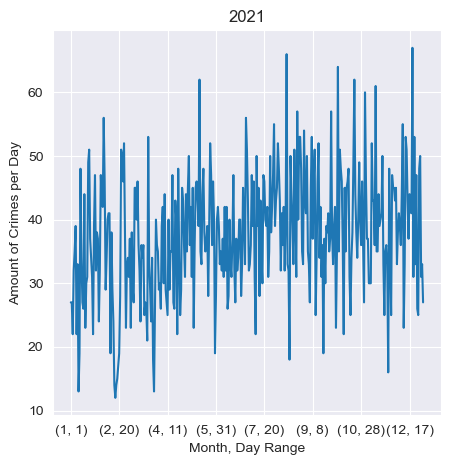

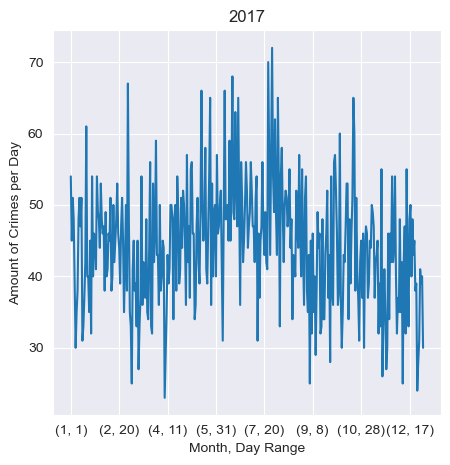

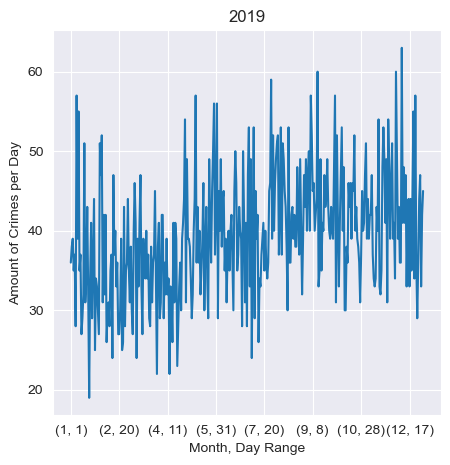

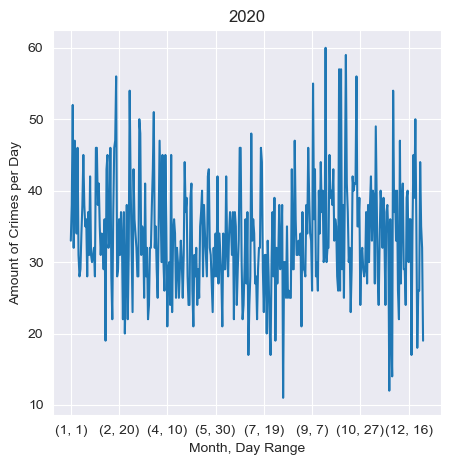

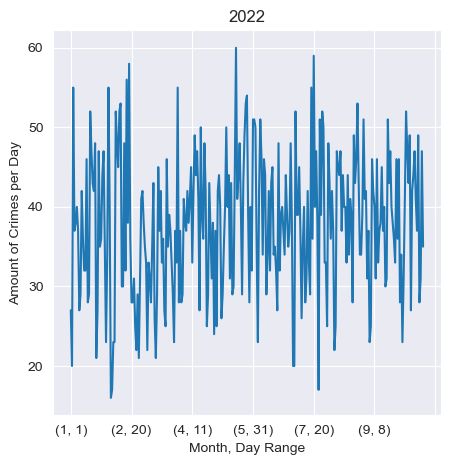

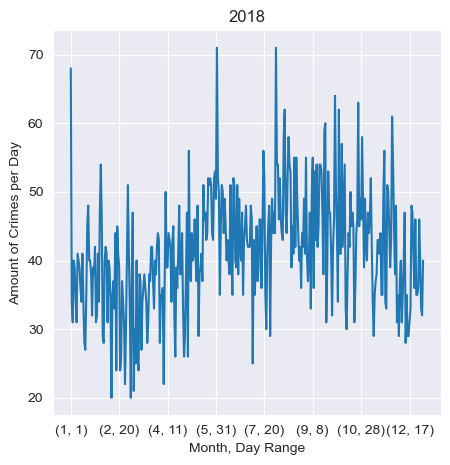

In [46]:
# Month/Day count of crimes per year.

years = lrpd["YEAR"].unique()

for year in years:
    crimesInYear = lrpd.loc[lrpd["YEAR"] == year]
    crimesPerDayInYear = crimesInYear.groupby(["MONTH", "DAY"]).count()["INCIDENT_NUMBER"]

    fig, ax = plt.subplots(figsize=(5, 5))
    lineplt = crimesPerDayInYear.plot(kind='line', ax=ax, xlabel="Month, Day Range", ylabel="Amount of Crimes per Day")
    plt.title(year)

### Interactive Map of crimes from 2017 to 2019

In [ ]:
#Import necessary libraries and create heatmap from actual map of Little Rock using LATITUDE and LONGITUDE.


In [ ]:
#Create heatmap of crimes in Little Rock
from collections import defaultdict, OrderedDict
data = defaultdict(list)
lrpd.dropna(subset=["LATITUDE", "LONGITUDE"], inplace=True)
for r in lrpd.itertuples():
    data[r.YEAR].append([r.LATITUDE, r.LONGITUDE])

data = OrderedDict(sorted(data.items(), key=lambda t: t[0]))

m = folium.Map(location=[34.7466, -92.2896], zoom_start=12, tiles="stamentoner")

hm = HeatMapWithTime(data=list(data.values()),
                     index=list(data.keys()),
                     radius=10,
                     auto_play=True,
                     max_opacity=0.3)
hm.add_to(m)
m

In [13]:
original = pd.read_csv

In [15]:
lrpd.loc[lrpd["OFFENSE_DESCRIPTION"] == "AGGRAVATED ASSAULT"]

,INCIDENT_DATE,INCIDENT_NUMBER,LOCATION_DISTRICT,OFFENSE_CODE,OFFENSE_DESCRIPTION,WEAPON_TYPE,INCIDENT_LOCATION,CITY,STATE,ZIP,LATITUDE,LONGITUDE,Location 1,Offense Status
21,12/03/2017 10:19:00 PM,2017-151947,90.0,13A,AGGRAVATED ASSAULT,OTHER,7 COLT AVE,LITTLE ROCK,AR,72209.0,34.685368,-92.358169,"(34.685368, -92.358169)",EX
22,03/13/2020 08:45:00 PM,2020-029413,90.0,13A,AGGRAVATED ASSAULT,BLUNT OBJECT,7700 N CHICOT RD,LITTLE ROCK,AR,72209.0,34.679407,-92.363380,"(34.679407, -92.36338)",EX
23,12/22/2021 11:06:00 AM,2021-155864,91.0,13A,AGGRAVATED ASSAULT,BLUNT OBJECT,12424 HEINKE RD,LITTLE ROCK,AR,72103.0,34.637375,-92.381975,"(34.637375, -92.381975)",AR
26,10/13/2019 08:41:00 PM,2019-128698,90.0,13A,AGGRAVATED ASSAULT,HANDGUN,8004 EDWINA DR,LITTLE ROCK,AR,72209.0,34.678802,-92.368855,"(34.678802, -92.368855)",AC
29,07/28/2022 09:44:00 AM,2022-088935,91.0,13A,AGGRAVATED ASSAULT,NaN,7809 NOLEN DR,LITTLE ROCK,AR,72209.0,34.662641,-92.365550,"(34.662641, -92.36555)",EX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88162,10/27/2018 10:20:00 AM,2018-137078,50.0,13A,AGGRAVATED ASSAULT,"PERSONAL WEAPONS (HANDS, FISTS, ETC)",5915 B ST,LITTLE ROCK,AR,72206.0,NaN,NaN,NaN,AR
88167,06/22/2018 03:54:00 AM,2018-076192,63.0,13A,AGGRAVATED ASSAULT,RIFLE,20 TOWNE PARK CT,LITTLE ROCK,AR,72227.0,34.761566,-92.376877,"(34.761566, -92.376877)",EX
88194,11/22/2021 03:21:00 AM,2021-143199,70.0,13A,AGGRAVATED ASSAULT,HANDGUN,11810 PLEASANT RIDGE RD,LITTLE ROCK,AR,72223.0,NaN,NaN,NaN,EX
88196,02/12/2022 11:04:00 PM,2022-017350,62.0,13A,AGGRAVATED ASSAULT,KNIFE/CUTTING INSTRUMENT,11401 MESA DR,LITTLE ROCK,AR,72211.0,34.756402,-92.400512,"(34.756402, -92.400512)",OP
